Definições de períodos:
def mapear_periodo(dt):
    if dt >= pd.Timestamp("2020-03-01") and dt <= pd.Timestamp("2022-02-28"):
        return "Pandemia"
    elif dt >= pd.Timestamp("2022-03-01") and dt <= pd.Timestamp("2024-04-30"):
        return "Pós-pandemia"
    elif dt >= pd.Timestamp("2024-05-01"):
        return "Enchentes"
    return "Fora"

 image.png

1) Dados das empresas do RS vindos da base da receita federal

In [1]:
import pandas as pd

# Ler as 1000 primeiras linhas
df = pd.read_csv('estabelecimentos_rs.csv', delimiter=',')
# Ver informações básicas
print(f"Linhas lidas: {len(df)}")
print(f"Colunas: {df.columns.tolist()}")

# Ver as primeiras 5 linhas
print(df.head())
print(f"Linhas no BRASIL: {len(df)}")

C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\2958077424.py:4: DtypeWarning: Columns (8,18,22,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('estabelecimentos_rs.csv', delimiter=',')


Linhas lidas: 4628876
Colunas: ['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'identificador_matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'nome_cidade_exterior', 'pais', 'data_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'tipo_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd1', 'telefone1', 'ddd2', 'telefone2', 'ddd_fax', 'fax', 'correio_eletronico', 'situacao_especial', 'data_situacao_especial']
   cnpj_basico  cnpj_ordem  cnpj_dv  identificador_matriz_filial  \
0     18106972           1       20                            1   
1     18107021           1       76                            1   
2     18107168           1       66                            1   
3     18107289           1        8                            1   
4     18107444           1       96                            1   

                             nome_fantasia  situacao_cadastral

2) A validação será simples, pois cnpj_basico tem sempre 8 dígitos (sem dígitos verificadores).
Então o critério de validade será:

❗ Válido → exatamente 8 dígitos numéricos

❗ Inválido → menos de 8 dígitos, mais de 8 ou contém letras/símbolos

Segue o código separado, limpo e direto, apenas para:

Remover duplicadas por cnpj_basico

Identificar registros com cnpj_basico inválido

Salvar os arquivos

In [6]:
import pandas as pd
import re

# ============================
# 1) ARQUIVOS
# ============================
arquivo_entrada = "estabelecimentos_rs.csv"
arquivo_saida_limpo = "1_estabelecimentos_rs_sem_duplicados.csv"
arquivo_cnpj_invalidos = "1_estabelecimentos_rs_cnpjs_basicos_invalidos.csv"

# ============================
# 2) FUNÇÃO DE LIMPEZA + VALIDAÇÃO
# ============================
def limpar_digitos(x):
    if pd.isna(x):
        return ""
    return re.sub(r"\D", "", str(x))

def cnpj_basico_valido(x):
    x = limpar_digitos(x)
    return len(x) == 8 and x.isdigit()

# ============================
# 3) CARREGAR CSV
# ============================
df = pd.read_csv(arquivo_entrada, dtype=str)

if 'cnpj_basico' not in df.columns:
    raise Exception("A coluna 'cnpj_basico' NÃO existe no CSV carregado!")

# ============================
# 4) REMOVER DUPLICADOS
# ============================
df['cnpj_basico_limpo'] = df['cnpj_basico'].apply(limpar_digitos)

df_sem_dup = df.drop_duplicates(subset=['cnpj_basico_limpo'])

print("Linhas antes:", len(df))
print("Linhas depois de remover duplicadas:", len(df_sem_dup))

# ============================
# 5) IDENTIFICAR CNPJs BÁSICOS INVÁLIDOS
# ============================
df_sem_dup['valido'] = df_sem_dup['cnpj_basico_limpo'].apply(cnpj_basico_valido)

df_invalidos = df_sem_dup[df_sem_dup['valido'] == False]

print("Quantidade de cnpj_basico inválidos:", len(df_invalidos))

# ============================
# 6) SALVAR RESULTADOS
# ============================
df_sem_dup.to_csv(arquivo_saida_limpo, index=False)
print("Arquivo salvo:", arquivo_saida_limpo)

if len(df_invalidos) > 0:
    df_invalidos.to_csv(arquivo_cnpj_invalidos, index=False)
    print("Arquivo com inválidos salvo:", arquivo_cnpj_invalidos)
else:
    print("Nenhum inválido encontrado!")


Linhas antes: 4628876
Linhas depois de remover duplicadas: 4408914


C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\925118952.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_dup['valido'] = df_sem_dup['cnpj_basico_limpo'].apply(cnpj_basico_valido)


Quantidade de cnpj_basico inválidos: 0
Arquivo salvo: 1_estabelecimentos_rs_sem_duplicados.csv
Nenhum inválido encontrado!


3) USAR APENAS AS COLUNAS ['cnpj_basico', 'identificador_matriz_filial', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'data_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'cep', 'uf', 'municipio', 'situacao_especial', 'data_situacao_especial']

In [11]:
import pandas as pd

# ============================
# 1) ARQUIVO DE ENTRADA
# ============================
arquivo_entrada = "1_estabelecimentos_rs_sem_duplicados.csv"      # coloque aqui o nome do seu arquivo

# ============================
# 2) COLUNAS QUE VOCÊ QUER MANter
# ============================
colunas_desejadas = [
    'cnpj_basico',
    'identificador_matriz_filial',
    'situacao_cadastral',
    'data_situacao_cadastral',
    'motivo_situacao_cadastral',
    'data_inicio_atividade',
    'cnae_fiscal_principal',
    'cnae_fiscal_secundaria',
    'cep',
    'uf',
    'municipio',
    'situacao_especial',
    'data_situacao_especial'
]

# ============================
# 3) CARREGAR O CSV ORIGINAL
# ============================
df = pd.read_csv(arquivo_entrada, dtype=str)  # sempre bom tratar tudo como string

# ============================
# 4) FILTRAR APENAS AS COLUNAS EXISTENTES
# ============================
colunas_existem = [c for c in colunas_desejadas if c in df.columns]

df_filtrado = df[colunas_existem]  # seleciona apenas as que existem

# ============================
# 5) SALVAR O NOVO DATAFRAME
# ============================
arquivo_saida = "2_empresas_RS.csv"
df_filtrado.to_csv(arquivo_saida, index=False)

print("Novo arquivo salvo como:", arquivo_saida)
print("Colunas mantidas:", colunas_existem)
print(df_filtrado.info())



Novo arquivo salvo como: 2_empresas_RS.csv
Colunas mantidas: ['cnpj_basico', 'identificador_matriz_filial', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'data_inicio_atividade', 'cnae_fiscal_principal', 'cnae_fiscal_secundaria', 'cep', 'uf', 'municipio', 'situacao_especial', 'data_situacao_especial']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408914 entries, 0 to 4408913
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   cnpj_basico                  object
 1   identificador_matriz_filial  object
 2   situacao_cadastral           object
 3   data_situacao_cadastral      object
 4   motivo_situacao_cadastral    object
 5   data_inicio_atividade        object
 6   cnae_fiscal_principal        object
 7   cnae_fiscal_secundaria       object
 8   cep                          object
 9   uf                           object
 10  municipio                    object
 11  situacao_espec

4) Ler o aquivo de empresas com porte nacional

In [ ]:
import pandas as pd

# Ler as 1000 primeiras linhas
df = pd.read_csv('resultado_com_porte.csv', delimiter=',')
# Ver informações básicas
print(f"Linhas lidas: {len(df)}")
print(f"Colunas: {df.columns.tolist()}")

# Ver as primeiras 5 linhas
print(df.head())
print(f"Linhas no BRASIL: {len(df)}")
print(df.info())


C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\4061874054.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('resultado_com_porte.csv', delimiter=',')


Linhas lidas: 63886531
Colunas: ['cnpj_basico', 'cep', 'data_inicio_atividade', 'DATA_FECHAMENTO', 'DATA_REABERTURA', 'porte']
   cnpj_basico         cep data_inicio_atividade DATA_FECHAMENTO  \
0     36284793  35179000.0            2020-02-06      2022-06-22   
1     36320715  22785620.0            2020-02-10      2022-11-30   
2     36301331  29980000.0            1991-10-30      2008-12-31   
3     36324231  57150000.0            2020-02-11      2024-07-09   
4     36324286  60752272.0            2020-02-11      2022-11-25   

  DATA_REABERTURA  porte  
0             NaN    1.0  
1             NaN    1.0  
2             NaN    1.0  
3             NaN    1.0  
4             NaN    1.0  
Linhas no BRASIL: 63886531


5) Pegar por CEP apenas as empresas e porte do RS

In [10]:
print("PEGANDO EMPRESAS NO RS por CEP")
# Ler as 1000 primeiras linhas
df = pd.read_csv('resultado_com_porte.csv', delimiter=',')
# Ver informações básicas
print(f"Linhas lidas: {len(df)}")
print(f"Colunas: {df.columns.tolist()}")

# Ver as primeiras 5 linhas
print(df.head())

# Remover hífen do CEP (se houver) e converter para inteiro
#df['cep'] = df['cep'].astype(str).str.replace('-', '').astype(float).astype('Int64')

# Filtrar apenas os registros com CEP do RS (90000000 a 99999999)
df_rs = df[df['cep'].between(90000000, 99999999)]

print(f"Linhas no RS: {len(df_rs)}")
# Salvar os dados filtrados em um arquivo CSV
df_rs.to_csv('2_resultado_com_porte_RS.csv', index=False)

print(df_rs.head())
print(df_rs.info())


PEGANDO EMPRESAS NO RS por CEP


C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\2655429773.py:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('resultado_com_porte.csv', delimiter=',')


Linhas lidas: 63886531
Colunas: ['cnpj_basico', 'cep', 'data_inicio_atividade', 'DATA_FECHAMENTO', 'DATA_REABERTURA', 'porte']
   cnpj_basico         cep data_inicio_atividade DATA_FECHAMENTO  \
0     36284793  35179000.0            2020-02-06      2022-06-22   
1     36320715  22785620.0            2020-02-10      2022-11-30   
2     36301331  29980000.0            1991-10-30      2008-12-31   
3     36324231  57150000.0            2020-02-11      2024-07-09   
4     36324286  60752272.0            2020-02-11      2022-11-25   

  DATA_REABERTURA  porte  
0             NaN    1.0  
1             NaN    1.0  
2             NaN    1.0  
3             NaN    1.0  
4             NaN    1.0  
Linhas no RS: 4380406
     cnpj_basico         cep data_inicio_atividade DATA_FECHAMENTO  \
26      38466618  96908000.0            2020-09-15      2021-02-28   
68      43051047  95705280.0            2021-08-09      2023-02-24   
130     48667876  97030280.0            2022-11-21      2024-09-10   


6) Agregar porte aos dados 2_empresas_RS.csv
O que esse script faz:

Normaliza cnpj_basico nos dois DataFrames (mesmo formato, 8 dígitos, string).

Usa essa chave (cnpj_chave) para fazer o merge.

Traz apenas ['data_inicio_atividade', 'DATA_FECHAMENTO', 'DATA_REABERTURA', 'porte'] do B.

Se data_inicio_atividade já existia em A, ele:

usa o valor de B quando não for nulo,

mantém o de A quando B estiver vazio.

Salva tudo em dataframe_A_com_dados_B.csv.

In [14]:
import pandas as pd
import re

df_a = pd.read_csv('2_empresas_RS.csv', delimiter=',')
df_b = pd.read_csv('2_resultado_com_porte_RS.csv', delimiter=',')

# =======================================
# 1) Função para normalizar o cnpj_basico
# =======================================
def normalizar_cnpj_basico(x):
    """
    - Remove tudo que não é dígito
    - Converte para string
    - Preenche com zeros à esquerda até 8 dígitos
    """
    if pd.isna(x):
        return None
    # transforma em string e remove não dígitos
    s = re.sub(r"\D", "", str(x))
    if s == "":
        return None
    # se tiver mais que 8 dígitos, pega os 8 primeiros (ajuste se não fizer sentido no teu contexto)
    if len(s) > 8:
        s = s[:8]
    return s.zfill(8)

# =======================================
# 2) Normalizar chave nos dois DataFrames
# =======================================
df_a['cnpj_chave'] = df_a['cnpj_basico'].apply(normalizar_cnpj_basico)
df_b['cnpj_chave'] = df_b['cnpj_basico'].apply(normalizar_cnpj_basico)

# =======================================
# 3) Preparar B com apenas as colunas que serão trazidas
# =======================================
colunas_para_trazer = ['data_inicio_atividade', 'DATA_FECHAMENTO', 'DATA_REABERTURA', 'porte']

df_b_reduzido = df_b[['cnpj_chave'] + colunas_para_trazer].copy()

# Se houver cnpjs repetidos em B, mantém só o primeiro (ou ajuste se quiser outra lógica)
df_b_reduzido = df_b_reduzido.drop_duplicates(subset=['cnpj_chave'])

# =======================================
# 4) Fazer o merge: A (esquerda) + B_reduzido (direita)
# =======================================
df_merged = pd.merge(
    df_a,
    df_b_reduzido,
    how='left',
    on='cnpj_chave',
    suffixes=('', '_B')
)

# =======================================
# 5) Se A já tiver 'data_inicio_atividade', preferir a de B quando existir
#    (sobrescreve A com B quando B não for nulo)
# =======================================
for col in colunas_para_trazer:
    if col in df_a.columns:
        # já existe em A → usa valor de B (coluna sem sufixo, pois usei direto de B_reduzido)
        df_merged[col] = df_merged[col + '_B'].combine_first(df_merged[col])
        df_merged.drop(columns=[col + '_B'], inplace=True)
    else:
        # não existia em A → já veio de B com o nome correto, não precisa mexer
        pass

# =======================================
# 6) Remover coluna de chave auxiliar se não quiser mantê-la
# =======================================
df_merged.drop(columns=['cnpj_chave'], inplace=True)

# =======================================
# 7) Salvar em CSV
# =======================================
arquivo_saida = "3_empresas_rs_porte.csv"
df_merged.to_csv(arquivo_saida, index=False)

print("Arquivo salvo em:", arquivo_saida)
print("Shape final:", df_merged.shape)

print(df_merged.head())
print(df_merged.info())


C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\3249511786.py:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a = pd.read_csv('2_empresas_RS.csv', delimiter=',')
C:\Users\cass7\AppData\Local\Temp\ipykernel_18072\3249511786.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv('2_resultado_com_porte_RS.csv', delimiter=',')


Arquivo salvo em: 3_empresas_rs_porte.csv
Shape final: (4408914, 16)
   cnpj_basico  identificador_matriz_filial  situacao_cadastral  \
0     18106972                            1                   8   
1     18107021                            1                   8   
2     18107168                            1                   8   
3     18107289                            1                   8   
4     18107444                            1                   8   

   data_situacao_cadastral  motivo_situacao_cadastral data_inicio_atividade  \
0                 20180201                         67            2013-05-14   
1                 20190117                          1            2013-05-14   
2                 20180201                         67            2013-05-14   
3                 20140430                          1            2013-05-14   
4                 20180201                         67            2013-05-14   

   cnae_fiscal_principal   cnae_fiscal_secundaria    

7) Descobrir o máximo de CNAEs secundários por linha

In [ ]:
import pandas as pd

# Leitura (recomendo ler tudo como string)
df = pd.read_csv("3_empresas_rs_porte.csv", dtype=str)




# Garante que a coluna existe e trata NaN
col = 'cnae_fiscal_secundaria'
df[col] = df[col].fillna('')

# Conta quantos itens separados por vírgula existem em cada linha
max_itens = (
    df[col]
    .astype(str)
    .apply(lambda x: 0 if x.strip() == '' else len([p for p in x.split(',') if p.strip() != '']))
    .max()
)

print("Máximo de CNAEs secundários em uma linha:", max_itens)


Máximo de CNAEs secundários em uma linha: 99


8) Eliminar colunade CNAEs secundários

In [2]:
import pandas as pd

# Leitura (recomendo ler tudo como string)
df = pd.read_csv("3_empresas_rs_porte.csv", dtype=str)
df.drop(columns=['cnae_fiscal_secundaria'], inplace=True)

# =======================================
# 7) Salvar em CSV
# =======================================
arquivo_saida = "3_empresas_rs_porte.csv"
df.to_csv(arquivo_saida, index=False)

print("Arquivo salvo em:", arquivo_saida)
print("Shape final:", df.shape)

print(df.head())
print(df.info())



Arquivo salvo em: 3_empresas_rs_porte.csv
Shape final: (4408914, 15)
  cnpj_basico identificador_matriz_filial situacao_cadastral  \
0    18106972                           1                  8   
1    18107021                           1                  8   
2    18107168                           1                  8   
3    18107289                           1                  8   
4    18107444                           1                  8   

  data_situacao_cadastral motivo_situacao_cadastral data_inicio_atividade  \
0                20180201                        67            2013-05-14   
1                20190117                         1            2013-05-14   
2                20180201                        67            2013-05-14   
3                20140430                         1            2013-05-14   
4                20180201                        67            2013-05-14   

  cnae_fiscal_principal       cep  uf municipio situacao_especial  \
0             

9) empresas que fecharam antes de 01/03/2020 e não reabriram após essa data → devem ser excluídas do DataFrame.

In [3]:
import pandas as pd

df = pd.read_csv("3_empresas_rs_porte.csv", dtype=str)  # caso ainda não tenha lido

# ----------------------------------------------
# 1) Converter datas de fechamento e reabertura
# ----------------------------------------------
df['DATA_FECHAMENTO'] = pd.to_datetime(df['DATA_FECHAMENTO'], errors='coerce')
df['DATA_REABERTURA'] = pd.to_datetime(df['DATA_REABERTURA'], errors='coerce')

data_limite = pd.to_datetime("2020-03-01")

# ----------------------------------------------
# 2) Criar condição das linhas que DEVEM ser REMOVIDAS
# ----------------------------------------------
condicao_remover = (
    (df['DATA_FECHAMENTO'] < data_limite) &               # fechou antes de março/2020
    (df['DATA_REABERTURA'].isna() | (df['DATA_REABERTURA'] < data_limite))  # e NÃO reabriu depois
)

print("Linhas a remover:", condicao_remover.sum())

# ----------------------------------------------
# 3) Remover essas linhas
# ----------------------------------------------
df_filtrado = df[~condicao_remover].copy()

# ----------------------------------------------
# 4) Salvar
# ----------------------------------------------
df_filtrado.to_csv("4_empresas_rs_porte.csv", index=False)

print("4_empresas_rs_porte.csv")
print("Shape final:", df_filtrado.shape)


Linhas a remover: 1723046
4_empresas_rs_porte.csv
Shape final: (2685868, 15)


10) Vamos montar um filtro perfeito para pegar somente as empresas que:

Fecharam antes da pandemia
👉 DATA_FECHAMENTO <= 2020-03-01

Reabriram durante um destes períodos

Pandemia (01/03/2020 a 28/02/2022)

Pós-pandemia (01/03/2022 a 30/04/2024)

Enchentes (01/05/2024 em diante)

Ou seja, queremos empresas que fecharam antes da pandemia e tiveram reabertura em alguma dessas fases.

Explicação da lógica

Uma empresa entra no resultado se:

✔ Fechou antes da pandemia:
DATA_FECHAMENTO <= 2020-03-01

✔ Reabriu depois em algum período relevante:

Durante pandemia

Pós-pandemia

Enchentes

A função mapear_periodo(dt) classifica automaticamente o período da reabertura.

🧪 Exemplo
FECHAMENTO	REABERTURA	Resultado
2019-05-10	2020-04-01	Pandemia
2018-10-20	2023-01-10	Pós-pandemia
2019-12-01	2024-05-12	Enchentes
2019-03-10	NaN	❌ Não entra
2020-05-10	2021-01-01	❌ Não entra (fechou depois da pandemia)

In [35]:
def mapear_periodo(dt):
    if pd.isna(dt):
        return "Sem reabertura"

    if dt >= pd.Timestamp("2020-03-01") and dt <= pd.Timestamp("2022-02-28"):
        return "Pandemia"
    elif dt >= pd.Timestamp("2022-03-01") and dt <= pd.Timestamp("2024-04-30"):
        return "Pós-pandemia"
    elif dt >= pd.Timestamp("2024-05-01") and dt <= pd.Timestamp("2024-12-31"):
        return "Enchentes"
    return "Fora"



In [36]:
import pandas as pd

df = pd.read_csv("4_empresas_rs_porte.csv", dtype=str)

# Converter datas
df["DATA_FECHAMENTO"]  = pd.to_datetime(df["DATA_FECHAMENTO"], errors="coerce")
df["DATA_REABERTURA"]  = pd.to_datetime(df["DATA_REABERTURA"], errors="coerce")

# Data limite da pandemia
data_limite = pd.Timestamp("2020-03-01")

# =============================
# 1) Empresas que FECHARAM antes da pandemia
# =============================
cond_fechou_antes = df["DATA_FECHAMENTO"] <= data_limite

# =============================
# 2) Empresas que REABRIRAM em algum dos períodos desejados
# =============================
df["PERIODO_REABERTURA"] = df["DATA_REABERTURA"].apply(mapear_periodo)

cond_reabriu_periodo = df["PERIODO_REABERTURA"].isin(["Pandemia", "Pós-pandemia", "Enchentes"])

# =============================
# 3) Filtro final
# =============================
df_final = df[cond_fechou_antes & cond_reabriu_periodo].copy()

print("Empresas encontradas:", len(df_final))

# Salvar
df_final.to_csv("5_empresas_reabriram_pandemia_pos_enchentes.csv", index=False)
print("Arquivo salvo: empresas_reabriram_pandemia_pos_enchentes.csv")


Empresas encontradas: 1785
Arquivo salvo: empresas_reabriram_pandemia_pos_enchentes.csv


11) 

In [38]:
!pip install pandas matplotlib lifelines geopandas


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# ============================
# 1) Ler arquivo
# ============================
ARQUIVO = "5_empresas_reabriram_pandemia_pos_enchentes.csv"

df = pd.read_csv(ARQUIVO, dtype=str)

# Converter datas
df["DATA_FECHAMENTO"]  = pd.to_datetime(df["DATA_FECHAMENTO"], errors="coerce")
df["DATA_REABERTURA"]  = pd.to_datetime(df["DATA_REABERTURA"], errors="coerce")

# Garantir que porte existe
if "porte" not in df.columns:
    df["porte"] = "Não informado"

# ============================
# 2) Função de mapeamento de período
# ============================
def mapear_periodo(dt):
    if pd.isna(dt):
        return "Sem reabertura"
    if dt >= pd.Timestamp("2020-03-01") and dt <= pd.Timestamp("2022-02-28"):
        return "Pandemia"
    elif dt >= pd.Timestamp("2022-03-01") and dt <= pd.Timestamp("2024-04-30"):
        return "Pós-pandemia"
    elif dt >= pd.Timestamp("2024-05-01") and dt <= pd.Timestamp("2024-12-31"):
        return "Enchentes"
    return "Fora"

df["PERIODO_REABERTURA"] = df["DATA_REABERTURA"].apply(mapear_periodo)

print(df[["DATA_FECHAMENTO", "DATA_REABERTURA", "PERIODO_REABERTURA"]].head())


  DATA_FECHAMENTO DATA_REABERTURA PERIODO_REABERTURA
0      2009-07-09      2021-11-29           Pandemia
1      2013-05-14      2020-11-13           Pandemia
2      2012-07-17      2020-03-11           Pandemia
3      2017-04-04      2022-05-02       Pós-pandemia
4      2013-05-28      2024-04-23       Pós-pandemia



Reaberturas por período:
 PERIODO_REABERTURA
Enchentes       270
Pandemia        669
Pós-pandemia    846
Name: count, dtype: int64


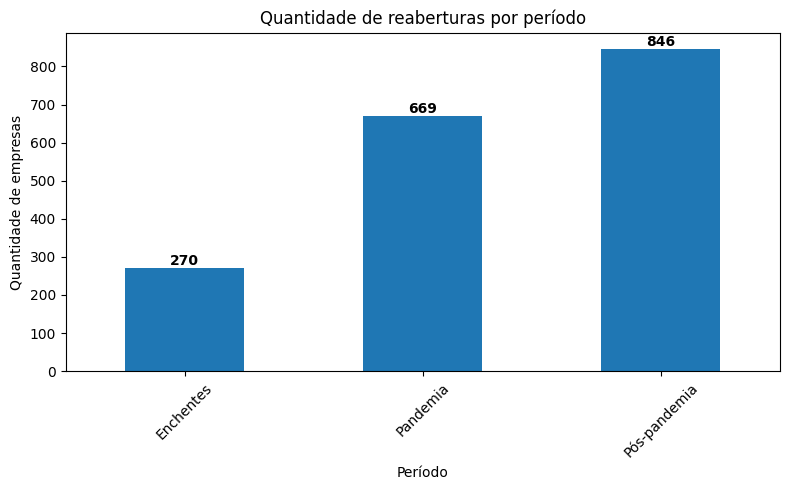

In [40]:
# Contagem de empresas por período
stats_periodos = df["PERIODO_REABERTURA"].value_counts().sort_index()
print("\nReaberturas por período:\n", stats_periodos)

plt.figure(figsize=(8, 5))
ax = stats_periodos.plot(kind="bar")
plt.title("Quantidade de reaberturas por período")
plt.xlabel("Período")
plt.ylabel("Quantidade de empresas")
plt.xticks(rotation=45)

# Adicionar valores nas colunas
ax.bar_label(ax.containers[0], fontweight='bold')

plt.tight_layout()
plt.show()


Porte x Período:
 PERIODO_REABERTURA  Enchentes  Pandemia  Pós-pandemia
porte                                                
1.0                        91       229           306
3.0                        51       136           171
5.0                       128       304           369


<Figure size 1000x600 with 0 Axes>

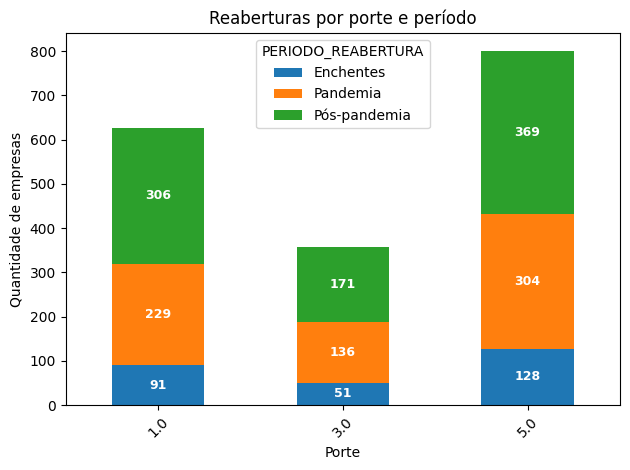

In [41]:
# Contagem cruzada porte x período
tabela_porte_periodo = pd.crosstab(df["porte"], df["PERIODO_REABERTURA"])
print("\nPorte x Período:\n", tabela_porte_periodo)

plt.figure(figsize=(10, 6))
ax = tabela_porte_periodo.plot(kind="bar", stacked=True)
plt.title("Reaberturas por porte e período")
plt.xlabel("Porte")
plt.ylabel("Quantidade de empresas")
plt.xticks(rotation=45)

# Adicionar valores dentro de cada segmento das barras empilhadas
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()


Top 10 municípios (IBGE) com mais reaberturas:
 municipio
8801    318
8599     94
8589     62
8771     60
8791     51
8785     45
8841     42
8683     37
8815     30
8561     28
Name: count, dtype: int64


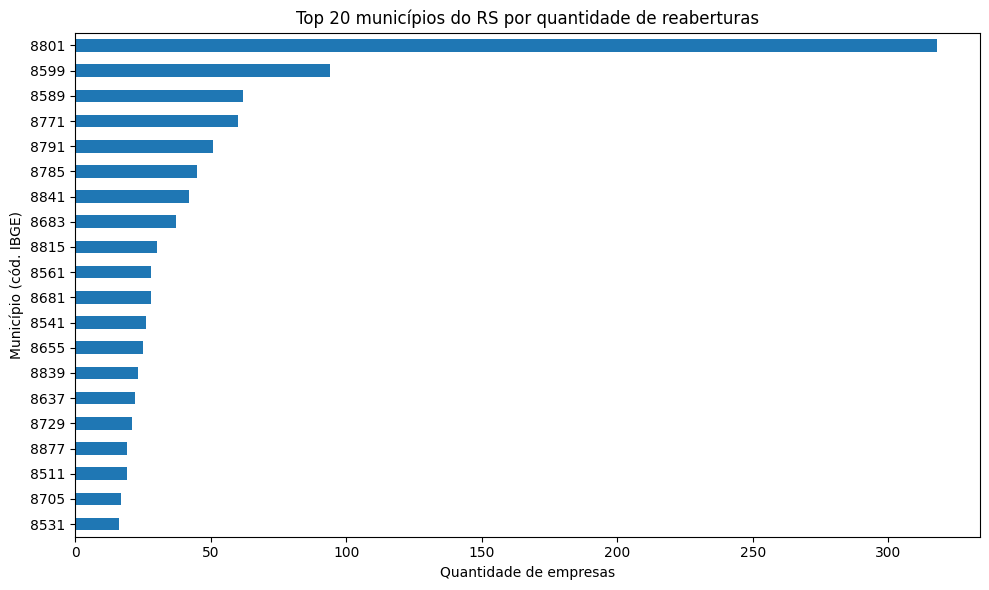

In [42]:
# Contagem por município
contagem_municipio = df["municipio"].value_counts()
print("\nTop 10 municípios (IBGE) com mais reaberturas:\n", contagem_municipio.head(10))

TOP_N = 20
top_mun = contagem_municipio.head(TOP_N)

plt.figure(figsize=(10, 6))
top_mun.sort_values().plot(kind="barh")
plt.title(f"Top {TOP_N} municípios do RS por quantidade de reaberturas")
plt.xlabel("Quantidade de empresas")
plt.ylabel("Município (cód. IBGE)")
plt.tight_layout()
plt.show()



Top 10 municípios (IBGE) com mais reaberturas:
 municipio
8801    318
8599     94
8589     62
8771     60
8791     51
8785     45
8841     42
8683     37
8815     30
8561     28
Name: count, dtype: int64


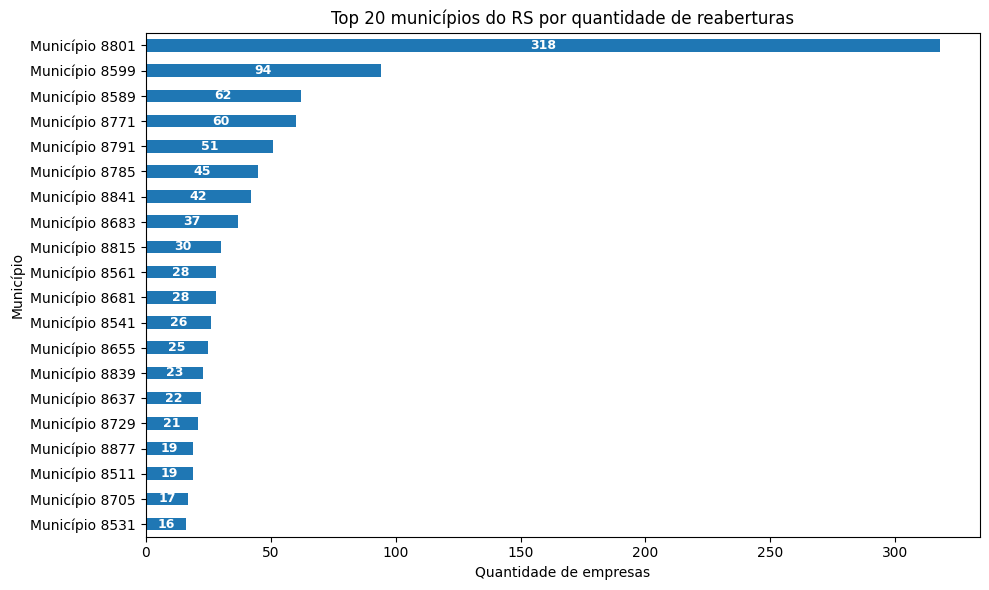

In [43]:
# Contagem por município
contagem_municipio = df["municipio"].value_counts()
print("\nTop 10 municípios (IBGE) com mais reaberturas:\n", contagem_municipio.head(10))

TOP_N = 20
top_mun = contagem_municipio.head(TOP_N)

# Mapear códigos IBGE para nomes dos municípios
# Opção 1: Usar biblioteca ibge (instalar: pip install ibge)
try:
    from ibge import municipios
    # Criar dicionário de mapeamento
    codigos_ibge = top_mun.index.tolist()
    mapeamento_nomes = {}
    for codigo in codigos_ibge:
        try:
            # Buscar nome do município pelo código IBGE
            # Nota: Ajuste conforme a API/biblioteca disponível
            nome = municipios.get_nome(codigo)  # Exemplo - ajuste conforme necessário
            mapeamento_nomes[codigo] = nome
        except:
            mapeamento_nomes[codigo] = f"Município {codigo}"
    
    # Renomear índices com os nomes
    top_mun.index = top_mun.index.map(lambda x: mapeamento_nomes.get(x, f"Município {x}"))
except:
    # Opção 2: Se não tiver a biblioteca, usar uma busca via API do IBGE
    import requests
    
    def buscar_nome_municipio(codigo_ibge):
        try:
            # API do IBGE para buscar município
            url = f"https://servicodados.ibge.gov.br/api/v1/localidades/municipios/{codigo_ibge}"
            response = requests.get(url, timeout=5)
            if response.status_code == 200:
                data = response.json()
                return data.get('nome', f"Município {codigo_ibge}")
            return f"Município {codigo_ibge}"
        except:
            return f"Município {codigo_ibge}"
    
    # Criar mapeamento
    codigos_ibge = top_mun.index.tolist()
    mapeamento_nomes = {cod: buscar_nome_municipio(cod) for cod in codigos_ibge}
    top_mun.index = top_mun.index.map(lambda x: mapeamento_nomes.get(x, f"Município {x}"))

# Ordenar valores para o gráfico
top_mun_ordenado = top_mun.sort_values()

plt.figure(figsize=(10, 6))
ax = top_mun_ordenado.plot(kind="barh")

plt.title(f"Top {TOP_N} municípios do RS por quantidade de reaberturas")
plt.xlabel("Quantidade de empresas")
plt.ylabel("Município")

# Adicionar valores dentro das barras horizontais
for i, v in enumerate(top_mun_ordenado.values):
    ax.text(v/2, i, str(int(v)), ha='center', va='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()


Top 10 municípios (IBGE) com mais reaberturas:
 municipio
8801    318
8599     94
8589     62
8771     60
8791     51
8785     45
8841     42
8683     37
8815     30
8561     28
Name: count, dtype: int64


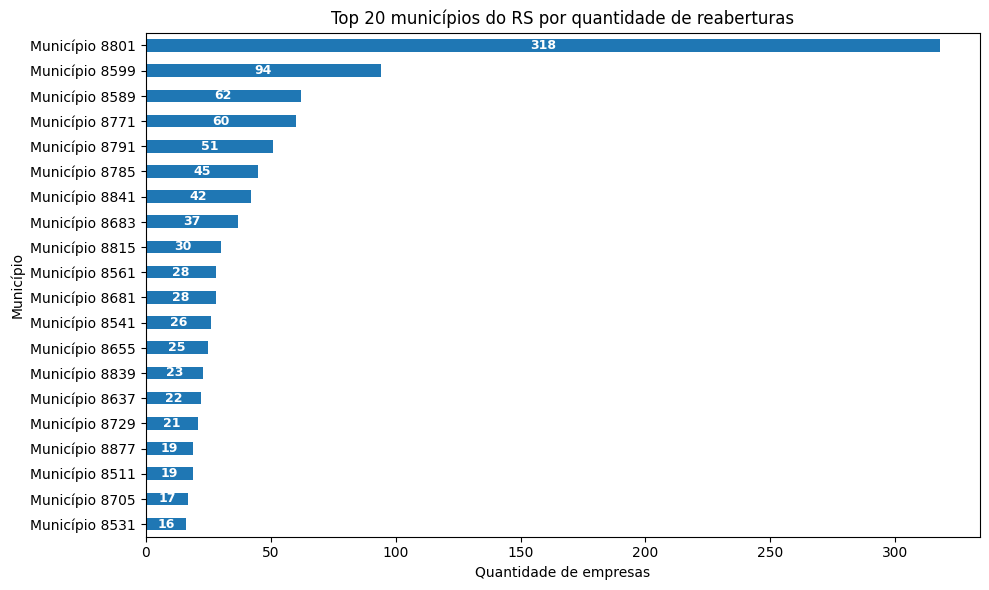

In [44]:
# Contagem por município
contagem_municipio = df["municipio"].value_counts()
print("\nTop 10 municípios (IBGE) com mais reaberturas:\n", contagem_municipio.head(10))

TOP_N = 20
top_mun = contagem_municipio.head(TOP_N)

# Mapear códigos IBGE para nomes dos municípios
# Opção 1: Usar biblioteca ibge (instalar: pip install ibge)
try:
    from ibge import municipios
    # Criar dicionário de mapeamento
    codigos_ibge = top_mun.index.tolist()
    mapeamento_nomes = {}
    for codigo in codigos_ibge:
        try:
            # Buscar nome do município pelo código IBGE
            # Nota: Ajuste conforme a API/biblioteca disponível
            nome = municipios.get_nome(codigo)  # Exemplo - ajuste conforme necessário
            mapeamento_nomes[codigo] = nome
        except:
            mapeamento_nomes[codigo] = f"Município {codigo}"
    
    # Renomear índices com os nomes
    top_mun.index = top_mun.index.map(lambda x: mapeamento_nomes.get(x, f"Município {x}"))
except:
    # Opção 2: Se não tiver a biblioteca, usar uma busca via API do IBGE
    import requests
    
    def buscar_nome_municipio(codigo_ibge):
        try:
            # API do IBGE para buscar município
            url = f"https://servicodados.ibge.gov.br/api/v1/localidades/municipios/{codigo_ibge}"
            response = requests.get(url, timeout=5)
            if response.status_code == 200:
                data = response.json()
                return data.get('nome', f"Município {codigo_ibge}")
            return f"Município {codigo_ibge}"
        except:
            return f"Município {codigo_ibge}"
    
    # Criar mapeamento
    codigos_ibge = top_mun.index.tolist()
    mapeamento_nomes = {cod: buscar_nome_municipio(cod) for cod in codigos_ibge}
    top_mun.index = top_mun.index.map(lambda x: mapeamento_nomes.get(x, f"Município {x}"))

# Ordenar valores para o gráfico
top_mun_ordenado = top_mun.sort_values()

plt.figure(figsize=(10, 6))
ax = top_mun_ordenado.plot(kind="barh")

plt.title(f"Top {TOP_N} municípios do RS por quantidade de reaberturas")
plt.xlabel("Quantidade de empresas")
plt.ylabel("Município")

# Adicionar valores dentro das barras horizontais
for i, v in enumerate(top_mun_ordenado.values):
    ax.text(v/2, i, str(int(v)), ha='center', va='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()


Timeline de reaberturas (por mês):
 ANO_MES_REABERTURA
2020-03    38
2020-04    12
2020-05    12
2020-06    18
2020-07    17
Name: count, dtype: int64


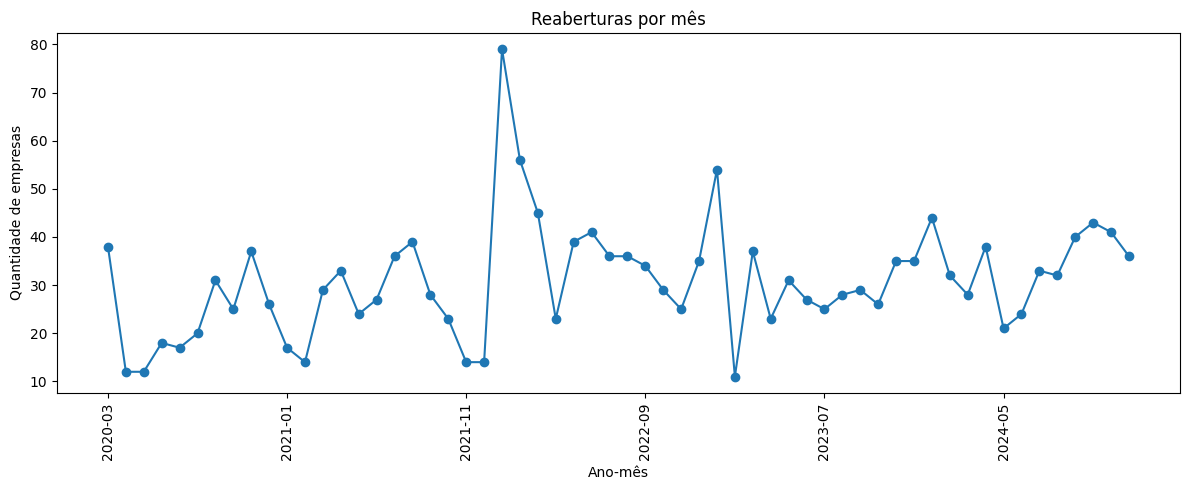

In [45]:
# Criar coluna ano-mês
df["ANO_MES_REABERTURA"] = df["DATA_REABERTURA"].dt.to_period("M").astype(str)

timeline = df["ANO_MES_REABERTURA"].value_counts().sort_index()
print("\nTimeline de reaberturas (por mês):\n", timeline.head())

plt.figure(figsize=(12, 5))
timeline.plot(kind="line", marker="o")
plt.title("Reaberturas por mês")
plt.xlabel("Ano-mês")
plt.ylabel("Quantidade de empresas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Resumo do tempo fechado (dias):
count     1785.000000
mean      4670.003922
std       3206.025276
min         97.000000
25%       2110.000000
50%       3821.000000
75%       6608.000000
max      16044.000000
Name: TEMPO_FECHADO_DIAS, dtype: float64


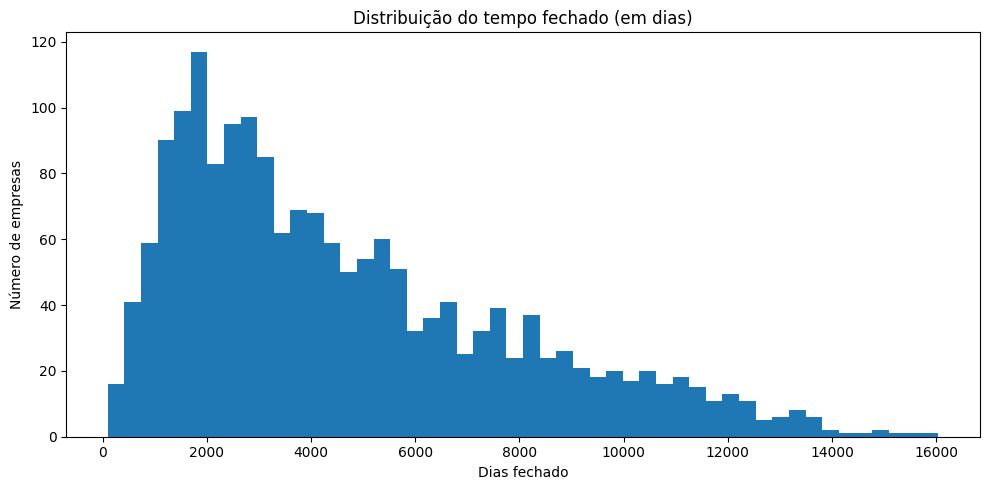

In [46]:
# Tempo fechado = diferença entre reabertura e fechamento
df["TEMPO_FECHADO_DIAS"] = (df["DATA_REABERTURA"] - df["DATA_FECHAMENTO"]).dt.days

print("\nResumo do tempo fechado (dias):")
print(df["TEMPO_FECHADO_DIAS"].describe())

plt.figure(figsize=(10, 5))
df["TEMPO_FECHADO_DIAS"].dropna().plot(kind="hist", bins=50)
plt.title("Distribuição do tempo fechado (em dias)")
plt.xlabel("Dias fechado")
plt.ylabel("Número de empresas")
plt.tight_layout()
plt.show()


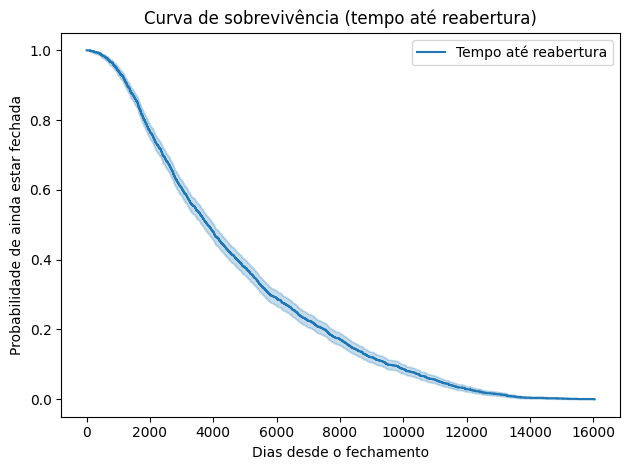

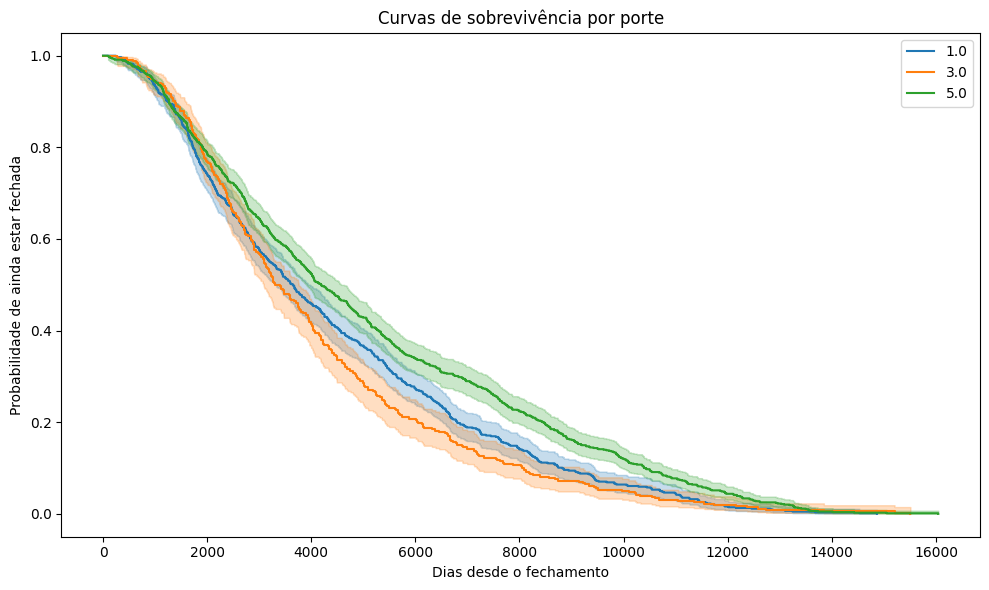

In [47]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Somente linhas com datas válidas
df_km = df.dropna(subset=["DATA_FECHAMENTO", "DATA_REABERTURA"]).copy()
df_km["TEMPO_FECHADO_DIAS"] = (df_km["DATA_REABERTURA"] - df_km["DATA_FECHAMENTO"]).dt.days

# Duração = tempo fechado
durations = df_km["TEMPO_FECHADO_DIAS"]

# Event = 1 (todas tiveram reabertura neste subconjunto)
event_observed = pd.Series(1, index=df_km.index)

kmf.fit(durations, event_observed, label="Tempo até reabertura")

ax = kmf.plot_survival_function()
ax.set_title("Curva de sobrevivência (tempo até reabertura)")
ax.set_xlabel("Dias desde o fechamento")
ax.set_ylabel("Probabilidade de ainda estar fechada")
plt.tight_layout()
plt.show()

# Exemplo de comparação por porte (se quiser)
plt.figure(figsize=(10, 6))
for porte, grupo in df_km.groupby("porte"):
    kmf_porte = KaplanMeierFitter()
    kmf_porte.fit(
        grupo["TEMPO_FECHADO_DIAS"],
        event_observed=pd.Series(1, index=grupo.index),
        label=str(porte)
    )
    kmf_porte.plot_survival_function()

plt.title("Curvas de sobrevivência por porte")
plt.xlabel("Dias desde o fechamento")
plt.ylabel("Probabilidade de ainda estar fechada")
plt.tight_layout()
plt.show()


11) 

Definições que vou usar (ajuste se quiser depois):

Período da pandemia: 2020-03-01 a 2022-02-28

Início das enchentes: 2024-05-01

Uma empresa está aberta em uma data D se:

já existe (data_inicio_atividade <= D) e

não está em um intervalo de fechamento ativo nessa data
(ou seja, não vale DATA_FECHAMENTO ≤ D < DATA_REABERTURA, ou DATA_FECHAMENTO ≤ D sem reabertura).

Com isso:

sobreviveu_pandemia = 1 se estava aberta em 2020-03-01 e em 2022-02-28.
Caso contrário (fechou em algum momento da pandemia ou já estivesse fechada em uma dessas datas) → 0.

sobreviveu_enchente = 1 se:

estava aberta em 2024-05-01 (aberta antes ou no início da enchente) e

não teve fechamento com data ≥ 2024-05-01.
Se fechou em algum momento a partir de 2024-05-01 → 0.

In [48]:
import pandas as pd

# ============================
# 1) Ler arquivo
# ============================
arquivo_entrada = "4_empresas_rs_porte.csv"
arquivo_saida = "6_empresas_rs_porte_sobreviveu_pandemia_enchente.csv"

df = pd.read_csv(arquivo_entrada, dtype=str)

# ============================
# 2) Converter datas
# ============================
df["data_inicio_atividade"] = pd.to_datetime(df["data_inicio_atividade"], errors="coerce")
df["DATA_FECHAMENTO"] = pd.to_datetime(df["DATA_FECHAMENTO"], errors="coerce")
df["DATA_REABERTURA"] = pd.to_datetime(df["DATA_REABERTURA"], errors="coerce")

# Datas de corte
ini_pandemia = pd.Timestamp("2020-03-01")
fim_pandemia = pd.Timestamp("2022-02-28")
ini_enchentes = pd.Timestamp("2024-05-01")
fim_enchentes = pd.Timestamp("2024-12-31")

# ============================
# 3) Função vetorizada: estava aberta em uma data D?
# ============================

def aberta_na_data(df, data_ref):
    """
    empresa está aberta na data_ref SE:
      - já existe (data_inicio_atividade <= data_ref)
      - NÃO está fechada em data_ref:
          DATA_FECHAMENTO <= data_ref < DATA_REABERTURA (ou sem reabertura)
    """
    # já existia nessa data
    existia = df["data_inicio_atividade"] <= data_ref

    # condição de estar fechada na data_ref
    fechou_antes_ou_na_data = df["DATA_FECHAMENTO"] <= data_ref
    ainda_nao_reabriu = df["DATA_REABERTURA"].isna() | (df["DATA_REABERTURA"] > data_ref)
    fechada_na_data = fechou_antes_ou_na_data & ainda_nao_reabriu

    # aberta = existia e NÃO estava fechada
    aberta = existia & (~fechada_na_data)
    return aberta.fillna(False)

# ============================
# 4) Sobreviveu à pandemia
# ============================

aberta_ini_pandemia = aberta_na_data(df, ini_pandemia)
aberta_fim_pandemia = aberta_na_data(df, fim_pandemia)

# Sobreviveu à pandemia se estava aberta no início e no fim
df["sobreviveu_pandemia"] = ((aberta_ini_pandemia & aberta_fim_pandemia).astype(int))

# Quem NÃO sobreviveu_pandemia (=0) é, em geral, quem:
#  - já estava fechada em 2020-03-01 ou
#  - estava aberta em 2020-03-01 mas não estava aberta em 2022-02-28
#    (fechou em algum momento dentro da janela da pandemia)

# ============================
# 5) Sobreviveu às enchentes
# ============================

aberta_ini_enchente = aberta_na_data(df, ini_enchentes)
aberta_fim_enchente = aberta_na_data(df, fim_enchentes)

# Empresas que continuaram abertas após o período das enchentes
# (não fecharam após 2024-12-31, ou seja, ainda estão abertas ou fecharam depois mas reabriram)
fechou_apos_enchentes = df["DATA_FECHAMENTO"] > fim_enchentes
sem_fechamento_ou_fechou_depois = df["DATA_FECHAMENTO"].isna() | fechou_apos_enchentes
# Se fechou depois, verifica se reabriu
reabriu_apos_fechamento = df["DATA_REABERTURA"] > df["DATA_FECHAMENTO"]
continuou_aberta_apos = sem_fechamento_ou_fechou_depois | (fechou_apos_enchentes & reabriu_apos_fechamento.fillna(False))

# Sobreviveu às enchentes se:
#  - estava aberta no início das enchentes (2024-05-01)
#  - E (estava aberta no fim do período OU continuou aberta após o período)
df["sobreviveu_enchente"] = (
    (aberta_ini_enchente & (aberta_fim_enchente | continuou_aberta_apos.fillna(False))).astype(int)
)

# Quem NÃO sobreviveu_enchente (=0) é, em geral, quem:
#  - já estava fechada em 2024-05-01 ou
#  - estava aberta em 2024-05-01 mas fechou durante o período das enchentes (2024-05-01 a 2024-12-31)
#    e não reabriu após o fechamento

# ============================
# 6) Salvar CSV
# ============================
df.to_csv(arquivo_saida, index=False)
print("Arquivo salvo em:", arquivo_saida)
print(df[["cnpj_basico", "sobreviveu_pandemia", "sobreviveu_enchente"]].head())

Arquivo salvo em: 6_empresas_rs_porte_sobreviveu_pandemia_enchente.csv
  cnpj_basico  sobreviveu_pandemia  sobreviveu_enchente
0    18108169                    1                    1
1    91110486                    1                    0
2    18108810                    1                    1
3    18109450                    1                    1
4    18110093                    1                    1


In [ ]:
print("Shape final:", df.shape)

print(df.head())
print(df.info())


Shape final: (2685868, 17)
  cnpj_basico identificador_matriz_filial situacao_cadastral  \
0    18108169                           1                  2   
1    91110486                           2                  2   
2    18108810                           1                  2   
3    18109450                           1                  2   
4    18110093                           1                  2   

  data_situacao_cadastral motivo_situacao_cadastral data_inicio_atividade  \
0                20130514                         0            2013-05-14   
1                20130114                         0            2013-01-14   
2                20130514                         0            2013-05-14   
3                20130514                         0            2013-05-14   
4                20130508                         0            2013-05-08   

  cnae_fiscal_principal       cep  uf municipio situacao_especial  \
0               4930201  94150430  RS      8683         

In [51]:
print(df.columns.tolist())

['cnpj_basico', 'identificador_matriz_filial', 'situacao_cadastral', 'data_situacao_cadastral', 'motivo_situacao_cadastral', 'data_inicio_atividade', 'cnae_fiscal_principal', 'cep', 'uf', 'municipio', 'situacao_especial', 'data_situacao_especial', 'DATA_FECHAMENTO', 'DATA_REABERTURA', 'porte', 'sobreviveu_pandemia', 'sobreviveu_enchente']


Arquivo salvo!

TAXA DE SOBREVIVÊNCIA POR PORTE:
       sobreviveu_pandemia  sobreviveu_enchente
porte                                          
1.0               0.333653             0.480837
3.0               0.530964             0.706261
5.0               0.545812             0.606004

TAXA DE SOBREVIVÊNCIA POR MUNICÍPIO (primeiros 10):
           sobreviveu_pandemia  sobreviveu_enchente
municipio                                          
1000                  0.290419             0.389222
1002                  0.358314             0.494145
1004                  0.438134             0.622718
1006                  0.380392             0.509804
1008                  0.370435             0.473043
1010                  0.371501             0.465649
1012                  0.401575             0.475066
1014                  0.400000             0.497872
1016                  0.375391             0.469239
1018                  0.327146             0.470998

TAXA DE SOBREVIVÊNCIA POR PERÍODO

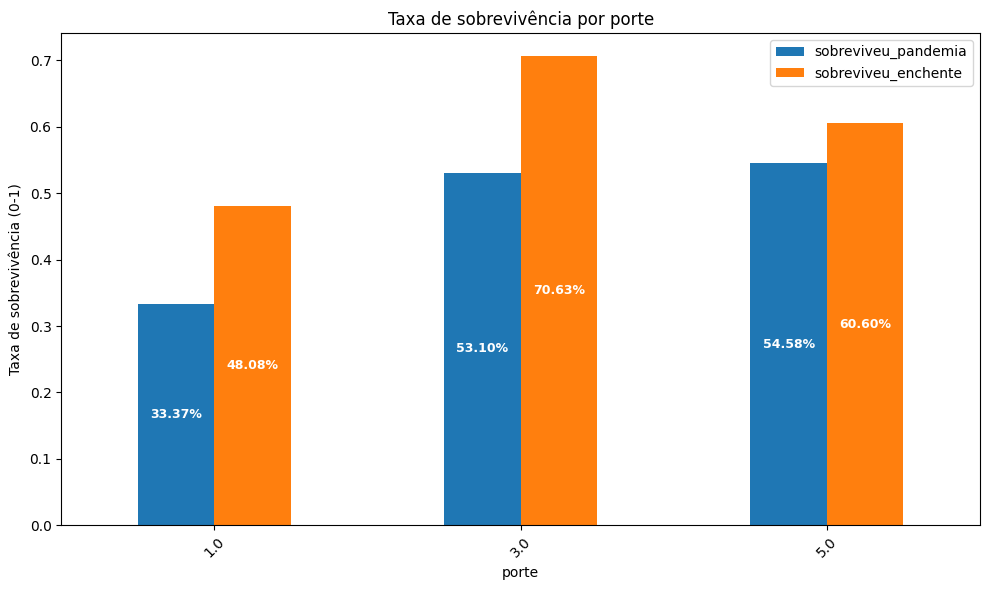

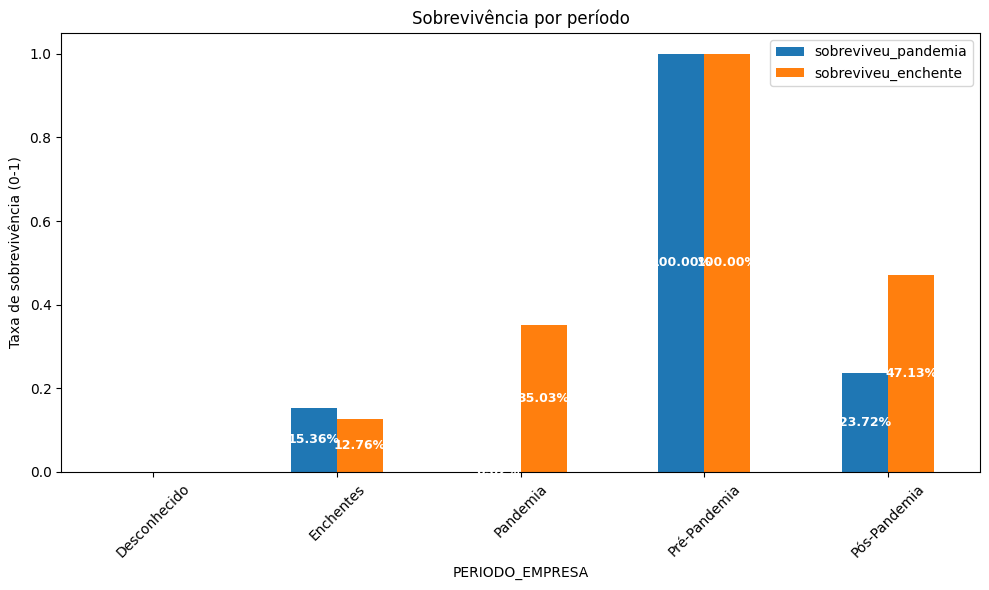

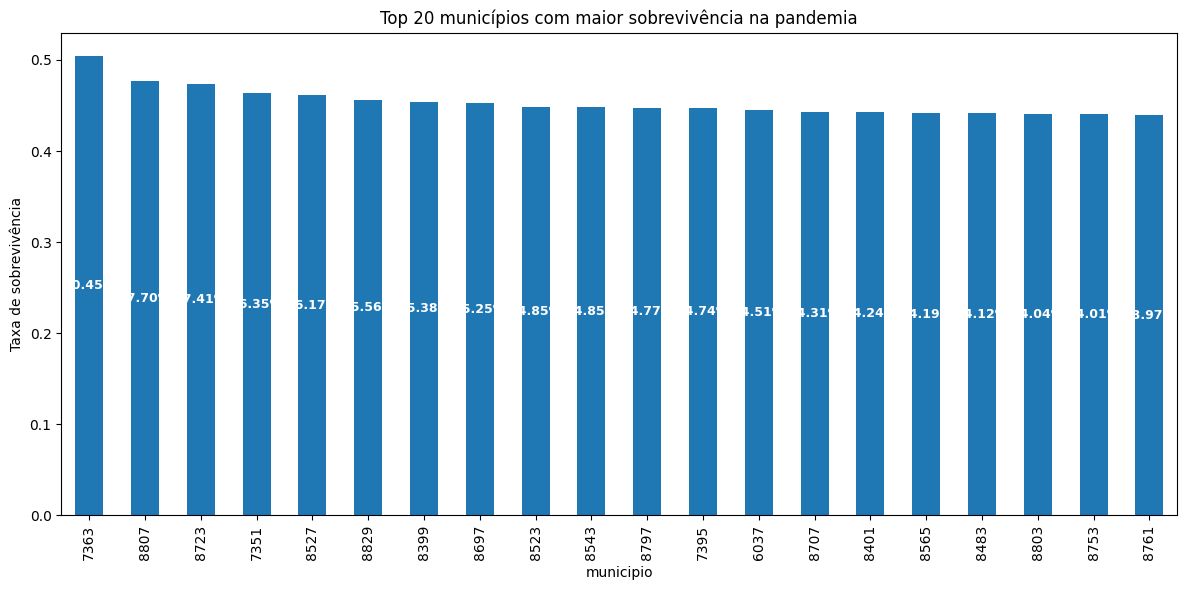

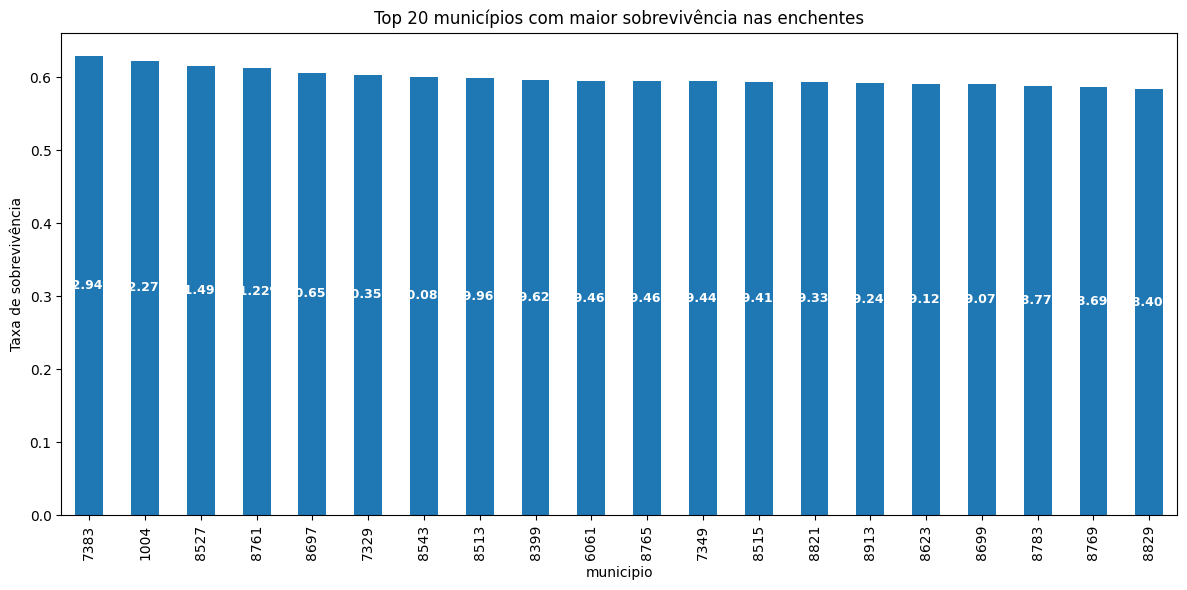

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================
# 1) Carregamento
# =============================================
df = pd.read_csv("6_empresas_rs_porte_sobreviveu_pandemia_enchente.csv", dtype=str)

# Converter datas
df["data_inicio_atividade"] = pd.to_datetime(df["data_inicio_atividade"], errors="coerce")
df["DATA_FECHAMENTO"] = pd.to_datetime(df["DATA_FECHAMENTO"], errors="coerce")
df["DATA_REABERTURA"] = pd.to_datetime(df["DATA_REABERTURA"], errors="coerce")

# Datas importantes
ini_pandemia = pd.Timestamp("2020-03-01")
fim_pandemia = pd.Timestamp("2022-02-28")
ini_enchentes = pd.Timestamp("2024-05-01")
fim_enchentes = pd.Timestamp("2024-12-31")

# =============================================
# 2) Função: estava aberta na data X ?
# =============================================
def aberta_na_data(df, data_ref):
    existia = df["data_inicio_atividade"] <= data_ref

    fechou_antes = df["DATA_FECHAMENTO"] <= data_ref
    sem_reabertura = df["DATA_REABERTURA"].isna()
    reabertura_apos = df["DATA_REABERTURA"] > data_ref

    fechada_na_data = fechou_antes & (sem_reabertura | reabertura_apos)

    return (existia & (~fechada_na_data)).fillna(False)

# =============================================
# 3) SOBREVIDÊNCIA NA PANDEMIA
# =============================================
aberta_inicio_pandemia = aberta_na_data(df, ini_pandemia)
aberta_fim_pandemia = aberta_na_data(df, fim_pandemia)

df["sobreviveu_pandemia"] = ((aberta_inicio_pandemia) & (aberta_fim_pandemia)).astype(int)

# =============================================
# 4) SOBREVIDÊNCIA NAS ENCHENTES
# =============================================
aberta_inicio_enchente = aberta_na_data(df, ini_enchentes)
aberta_fim_enchente = aberta_na_data(df, fim_enchentes)

# Empresas que continuaram abertas após o período das enchentes
# (não fecharam após 2024-12-31, ou seja, ainda estão abertas ou fecharam depois mas reabriram)
fechou_apos_enchentes = df["DATA_FECHAMENTO"] > fim_enchentes
sem_fechamento_ou_fechou_depois = df["DATA_FECHAMENTO"].isna() | fechou_apos_enchentes
# Se fechou depois, verifica se reabriu
reabriu_apos_fechamento = df["DATA_REABERTURA"] > df["DATA_FECHAMENTO"]
continuou_aberta_apos = sem_fechamento_ou_fechou_depois | (fechou_apos_enchentes & reabriu_apos_fechamento.fillna(False))

# Sobreviveu às enchentes se:
#  - estava aberta no início das enchentes (2024-05-01)
#  - E (estava aberta no fim do período OU continuou aberta após o período)
df["sobreviveu_enchente"] = (
    (aberta_inicio_enchente & (aberta_fim_enchente | continuou_aberta_apos.fillna(False))).astype(int)
)

# =============================================
# 5) Classificar PERÍODO da ÚLTIMA SITUAÇÃO
# =============================================
def classificar_periodo(row):
    """
    A data considerada é:
        - DATA_REABERTURA (se existir)
        - senão DATA_FECHAMENTO
        - senão data_inicio_atividade
    """
    if pd.notna(row["DATA_REABERTURA"]):
        dt = row["DATA_REABERTURA"]
    elif pd.notna(row["DATA_FECHAMENTO"]):
        dt = row["DATA_FECHAMENTO"]
    else:
        dt = row["data_inicio_atividade"]

    if dt < ini_pandemia:
        return "Pré-Pandemia"
    if ini_pandemia <= dt <= fim_pandemia:
        return "Pandemia"
    if dt <= pd.Timestamp("2024-04-30"):
        return "Pós-Pandemia"
    if dt >= ini_enchentes:
        return "Enchentes"
    return "Desconhecido"

df["PERIODO_EMPRESA"] = df.apply(classificar_periodo, axis=1)

# Salvar
df.to_csv("4_empresas_rs_porte_sobrevivencia.csv", index=False)
print("Arquivo salvo!")

# ======================================================
# 6) =================== TABELAS ========================
# ======================================================

# TAXA DE SOBREVIVÊNCIA POR PORTE
tabela_porte = df.groupby("porte")[["sobreviveu_pandemia","sobreviveu_enchente"]].mean()
print("\nTAXA DE SOBREVIVÊNCIA POR PORTE:")
print(tabela_porte)

# TAXA POR MUNICÍPIO
tabela_municipio = df.groupby("municipio")[["sobreviveu_pandemia","sobreviveu_enchente"]].mean()
print("\nTAXA DE SOBREVIVÊNCIA POR MUNICÍPIO (primeiros 10):")
print(tabela_municipio.head(10))

# TAXA POR PERÍODO
tabela_periodo = df.groupby("PERIODO_EMPRESA")[["sobreviveu_pandemia","sobreviveu_enchente"]].mean()
print("\nTAXA DE SOBREVIVÊNCIA POR PERÍODO:")
print(tabela_periodo)

# ======================================================
# 7) =================== GRÁFICOS =======================
# ======================================================

# --------------------------
# 7.1 Sobrevivência por PORTE
# --------------------------
ax = tabela_porte.plot(kind="bar", figsize=(10,6))
plt.title("Taxa de sobrevivência por porte")
plt.ylabel("Taxa de sobrevivência (0-1)")
plt.xticks(rotation=45)

# Adicionar valores dentro das barras em porcentagem
for container in ax.containers:
    labels = [f'{v.get_height()*100:.2f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()

# --------------------------
# 7.2 Sobrevivência por PERÍODO
# --------------------------
ax = tabela_periodo.plot(kind="bar", figsize=(10,6))
plt.title("Sobrevivência por período")
plt.ylabel("Taxa de sobrevivência (0-1)")
plt.xticks(rotation=45)

# Adicionar valores dentro das barras em porcentagem
for container in ax.containers:
    labels = [f'{v.get_height()*100:.2f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()

# --------------------------
# 7.3 Top 20 municípios que mais sobreviveram à pandemia
# --------------------------
top_mun_pand = tabela_municipio["sobreviveu_pandemia"].sort_values(ascending=False).head(20)

ax = top_mun_pand.plot(kind="bar", figsize=(12,6))
plt.title("Top 20 municípios com maior sobrevivência na pandemia")
plt.ylabel("Taxa de sobrevivência")
plt.xticks(rotation=90)

# Adicionar valores dentro das barras em porcentagem
for i, v in enumerate(top_mun_pand.values):
    ax.text(i, v/2, f'{v*100:.2f}%', ha='center', va='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()

# --------------------------
# 7.4 Top 20 municípios que mais sobreviveram às enchentes
# --------------------------
top_mun_ench = tabela_municipio["sobreviveu_enchente"].sort_values(ascending=False).head(20)

ax = top_mun_ench.plot(kind="bar", figsize=(12,6))
plt.title("Top 20 municípios com maior sobrevivência nas enchentes")
plt.ylabel("Taxa de sobrevivência")
plt.xticks(rotation=90)

# Adicionar valores dentro das barras em porcentagem
for i, v in enumerate(top_mun_ench.values):
    ax.text(i, v/2, f'{v*100:.2f}%', ha='center', va='center', fontweight='bold', color='white', fontsize=9)

plt.tight_layout()
plt.show()

12) 

13) Dados dos posts

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================================
# 1) Carregamento
# =============================================
df = pd.read_csv("dados_unidos.csv", dtype=str)
print("Shape final:", df.shape)

print(df.head())
print(df.info())

Shape final: (2068457, 10)
                 cnpj followers_count media_count  \
0  07.118.629/0001-80         17404.0       691.0   
1  07.118.629/0001-80         17404.0       691.0   
2  07.118.629/0001-80         17404.0       691.0   
3  07.118.629/0001-80         17404.0       691.0   
4  07.118.629/0001-80         17404.0       691.0   

                                 profile_picture_url  \
0  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
1  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
2  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
3  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
4  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   

                                           biography  \
0  Incorporadora com 23 anos de atuação em Capão ...   
1  Incorporadora com 23 anos de atuação em Capão ...   
2  Incorporadora com 23 anos de atuação em Capão ...   
3  Incorporadora com 23 anos de atuação em Capão ...   
4  Incorporadora com 23 anos de atuaç

In [54]:
df.drop(columns=["sobreviveu"], inplace=True)
df.to_csv("7_dados_unidos.csv", index=False)
print("Shape final:", df.shape)
print(df.head())
print(df.info())

Shape final: (2068457, 9)
                 cnpj followers_count media_count  \
0  07.118.629/0001-80         17404.0       691.0   
1  07.118.629/0001-80         17404.0       691.0   
2  07.118.629/0001-80         17404.0       691.0   
3  07.118.629/0001-80         17404.0       691.0   
4  07.118.629/0001-80         17404.0       691.0   

                                 profile_picture_url  \
0  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
1  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
2  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
3  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   
4  https://scontent.fpoa4-1.fna.fbcdn.net/v/t51.2...   

                                           biography  \
0  Incorporadora com 23 anos de atuação em Capão ...   
1  Incorporadora com 23 anos de atuação em Capão ...   
2  Incorporadora com 23 anos de atuação em Capão ...   
3  Incorporadora com 23 anos de atuação em Capão ...   
4  Incorporadora com 23 anos de atuaçã

UTILS

In [34]:
import pandas as pd

# Ler o arquivo CSV original
df = pd.read_csv('7_dados_unidos.csv')

# Pegar 10000 registros aleatórios
df_sample = df.sample(n=10000, random_state=42)

# Salvar em um novo arquivo
df_sample.to_csv('7_dados_unidos_10000_registros.csv', index=False)

C:\Users\cass7\AppData\Local\Temp\ipykernel_12092\4232774238.py:4: DtypeWarning: Columns (1,2,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('7_dados_unidos.csv')


In [ ]:
import pandas as pd

# Ler o arquivo CSV original
df = pd.read_csv('8_DADOS_UNIDOS_dataset_processado.csv')

# Pegar 10000 registros aleatórios
df_sample = df.sample(n=10000, random_state=42)

# Salvar em um novo arquivo
df_sample.to_csv('8_DADOS_UNIDOS_dataset_processado_10000.csv', index=False)

C:\Users\cass7\AppData\Local\Temp\ipykernel_12092\1123992440.py:4: DtypeWarning: Columns (7,8,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('8_DADOS_UNIDOS_dataset_processado.csv')


: 

In [56]:
import pandas as pd

# Ler o arquivo CSV original
df = pd.read_csv('6_empresas_rs_porte_sobreviveu_pandemia_enchente.csv')

# Pegar 10000 registros aleatórios
df_sample = df.sample(n=100000, random_state=42)

# Salvar em um novo arquivo
df_sample.to_csv('6_empresas_rs_porte_sobreviveu_pandemia_enchente_100000.csv', index=False)

C:\Users\cass7\AppData\Local\Temp\ipykernel_12092\2801773981.py:4: DtypeWarning: Columns (7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('6_empresas_rs_porte_sobreviveu_pandemia_enchente.csv')
